# In-game Metrics 

## 1. Data Scrap
This code scrap teams statistic data from FoxSoccer. The scraped data will be used to calculate in-game metrics, which will be visualized.

In [1]:
import numpy as np
import urllib2
from bs4 import BeautifulSoup
import pandas as pd
import sys


#plt.rcParams['backend'] = "Qt4Agg"
#set unicode for error 'UnicodeEncodeError"
reload(sys)
sys.setdefaultencoding('utf-8')

#create User-Agent (solve 404 error)
opener = urllib2.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]


In [2]:
#compile urls into a list 
url_list = [['http://www.foxsports.com/soccer/team-stats?competition=1&season=20160&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=1&season=20150&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=1&season=20140&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=1&season=20130&category=standard&sort=1'],
            ['http://www.foxsports.com/soccer/team-stats?competition=2&season=20160&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=2&season=20150&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=2&season=20140&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=2&season=20130&category=standard&sort=1'],
            ['http://www.foxsports.com/soccer/team-stats?competition=3&season=20160&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=3&season=20150&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=3&season=20140&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=3&season=20130&category=standard&sort=1'],
            ['http://www.foxsports.com/soccer/team-stats?competition=4&season=20160&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=4&season=20150&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=4&season=20140&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=4&season=20130&category=standard&sort=1']]



In [3]:
#inputing url for scraping
url_header = opener.open('http://www.foxsports.com/soccer/team-stats?competition=1&season=20160&category=standard&sort=1')

#parse url into soup
soup = BeautifulSoup(url_header, "html.parser")


#find table
table = soup.find("table", attrs = {'class' : 'wisbb_standardTable'})


#find headers
table_rows = table.findAll('th')
table_headers =[th.text for th in table_rows]

#remove spacing symbols
table_headers = [headers.replace('\r\n','') for headers in table_headers]
table_headers = [headers.replace('\t','') for headers in table_headers]

#adding "SEASON" and "LEAGUE" columns into table header
table_headers.append('SEASON')
table_headers.append('LEAGUE')

table_headers



[u'STANDARD',
 u'GP',
 u'GF',
 u'A',
 u'SOG',
 u'S',
 u'HG',
 u'KG',
 u'YC',
 u'RC',
 u'F',
 u'OFF',
 'SEASON',
 'LEAGUE']

In [4]:
#compile urls into a list 
url_list = [['http://www.foxsports.com/soccer/team-stats?competition=1&season=20160&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=1&season=20150&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=1&season=20140&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=1&season=20130&category=standard&sort=1'],
            ['http://www.foxsports.com/soccer/team-stats?competition=2&season=20160&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=2&season=20150&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=2&season=20140&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=2&season=20130&category=standard&sort=1'],
            ['http://www.foxsports.com/soccer/team-stats?competition=3&season=20160&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=3&season=20150&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=3&season=20140&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=3&season=20130&category=standard&sort=1'],
            ['http://www.foxsports.com/soccer/team-stats?competition=4&season=20160&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=4&season=20150&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=4&season=20140&category=standard&sort=1',
           'http://www.foxsports.com/soccer/team-stats?competition=4&season=20130&category=standard&sort=1']]



In [5]:
#create empty list for data
Data = []

#fill Data with values 
for url_league in url_list:
    for url in url_league:
        url_rows = opener.open(url)

        #parse url into soup
        soup = BeautifulSoup(url_rows, "html.parser")

        #find table
        table = soup.find("table", attrs = {'class' : 'wisbb_standardTable'})
    
        data_rows = table.findAll('tr')[1:]
        #find all <tr> tag
        for i in range(len(data_rows)):
            team_rows = [] #create an emptly list for each team's record


        #for each table data element from each table row
            for td in data_rows[i].findAll('td'):
                textrow = td.getText()

                if td == data_rows[i].find('td'):
                    td = data_rows[i].findAll('span')[1]
                    textrow = td.getText() #set found string to variable 
                
                #extract extra chracters
                if '\n\n\n' in textrow:
                    textrow = textrow.replace('\n\n\n','')
                if '\n' in textrow:
                    textrow = textrow.replace('\n','')
                team_rows.append(textrow)
            

            #Fill 'SEASON' value   
            if '20160' in url:
                team_rows.append('2016')
            elif '20150' in url:
                team_rows.append('2015')
            elif '20140' in url:
                team_rows.append('2014')
            else:
                team_rows.append('2013')
                
            #Fill 'LEAGUE' value
            if 'competition=1' in url:
                team_rows.append('Premier League')
            elif 'competition=2' in url:
                team_rows.append('La Liga')
            elif 'competition=3' in url:
                team_rows.append('Serie A')
            else:
                team_rows.append('Bundesliga I')
   
                    
        #Append each team matrix
            Data.append(team_rows)

#put the rows and headers into a dataframe
df = pd.DataFrame(Data, columns = table_headers)

df.head()




,STANDARD,GP,GF,A,SOG,S,HG,KG,YC,RC,F,OFF,SEASON,LEAGUE
0,Tottenham Hotspur,38,86,59,257,669,10,74,62,0,432,74,2016,Premier League
1,Chelsea,38,85,57,205,579,9,74,72,0,395,64,2016,Premier League
2,Manchester City,38,80,52,215,631,6,69,71,4,395,89,2016,Premier League
3,Liverpool,38,78,56,236,639,11,66,54,0,396,77,2016,Premier League
4,Arsenal,38,77,56,202,565,12,58,68,3,399,96,2016,Premier League


In [6]:
df.dtypes

STANDARD    object
GP          object
GF          object
A           object
SOG         object
S           object
HG          object
KG          object
YC          object
RC          object
F           object
OFF         object
SEASON      object
LEAGUE      object
dtype: object

In [7]:
#convert records type from object to numeric (integer)
df[['GP','GF', 
     'A','SOG',
     'S','HG','KG',
     'YC','RC','F','OFF','SEASON']] = df[['GP','GF', 
     'A','SOG',
     'S','HG','KG',
     'YC','RC','F','OFF', 'SEASON']].apply(pd.to_numeric, downcast = 'integer')

df.dtypes





STANDARD    object
GP            int8
GF            int8
A             int8
SOG          int16
S            int16
HG            int8
KG            int8
YC           int16
RC            int8
F            int16
OFF          int16
SEASON       int16
LEAGUE      object
dtype: object

## 2. Metrics Calculation 

Calculate aggergated data for metrics visualization 

In [8]:
#change first column's name to 'TEAM'
df.rename(columns = {u'STANDARD' : 'TEAM'}, inplace = True)

#group by Team and Season for aggergation 
dfGrouped = df.groupby(['TEAM','SEASON'])

In [9]:
#Add 'Goals Per Game' calculation to each team record
df['GPG'] = df[df["LEAGUE"] == "Bundesliga I"]["GF"]/34
df['GPG'][df["LEAGUE"] <> "Bundesliga I"] = df[df["LEAGUE"] <> "Bundesliga I"]["GF"]/38

#Add 'Shots on Goal Per Game' calculation to each team record
df['SOGPG'] = df[df["LEAGUE"] == "Bundesliga I"]["SOG"]/34
df['SOGPG'][df["LEAGUE"] <> "Bundesliga I"] = df[df["LEAGUE"] <> "Bundesliga I"]["SOG"]/38

#Add 'Fouls Per Game' calculation to each team record
df['FPG'] = df[df["LEAGUE"] == "Bundesliga I"]["F"]/34
df['FPG'][df["LEAGUE"] <> "Bundesliga I"] = df[df["LEAGUE"] <> "Bundesliga I"]["F"]/38

#Add 'Red Cards Per Game' calculation to each team record
df['RCPG'] = df[df["LEAGUE"] == "Bundesliga I"]["RC"]/34
df['RCPG'][df["LEAGUE"] <> "Bundesliga I"] = df[df["LEAGUE"] <> "Bundesliga I"]["RC"]/38

#Add 'Yellow Cards Per Game' calculation to each team record
df['YCPG'] = df[df["LEAGUE"] == "Bundesliga I"]["YC"]/34
df['YCPG'][df["LEAGUE"] <> "Bundesliga I"] = df[df["LEAGUE"] <> "Bundesliga I"]["YC"]/38


#Round up calculation by 2 decimal points
df = df.round({'GPG': 2, 'SOGPG': 2, 'FPG': 2, 'RCPG': 2, 'YCPG': 2})

df.head()

,TEAM,GP,GF,A,SOG,S,HG,KG,YC,RC,F,OFF,SEASON,LEAGUE,GPG,SOGPG,FPG,RCPG,YCPG
0,Tottenham Hotspur,38,86,59,257,669,10,74,62,0,432,74,2016,Premier League,2.26,6.76,11.37,0.00,1.63
1,Chelsea,38,85,57,205,579,9,74,72,0,395,64,2016,Premier League,2.24,5.39,10.39,0.00,1.89
2,Manchester City,38,80,52,215,631,6,69,71,4,395,89,2016,Premier League,2.11,5.66,10.39,0.11,1.87
3,Liverpool,38,78,56,236,639,11,66,54,0,396,77,2016,Premier League,2.05,6.21,10.42,0.00,1.42
4,Arsenal,38,77,56,202,565,12,58,68,3,399,96,2016,Premier League,2.03,5.32,10.50,0.08,1.79


## 3.Visualization 



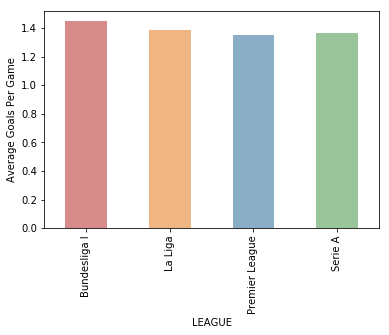

In [10]:
##VISUALIZATION
import matplotlib.pyplot as plt
from itertools import cycle, islice
%matplotlib inline

#Set colors for each value
my_colors = list(islice(cycle(['#d78b8b', '#efb583', '#8aaec6', '#9ac59a']), None, len(df)))

#Set aggergration by league 
dfGrouped = df.groupby(['LEAGUE'])
 
#GPG Calculation 
Fouls_Viz = dfGrouped['GPG'].mean()

BarChart = Fouls_Viz.plot(kind = 'bar', color = my_colors).set_ylabel('Average Goals Per Game')


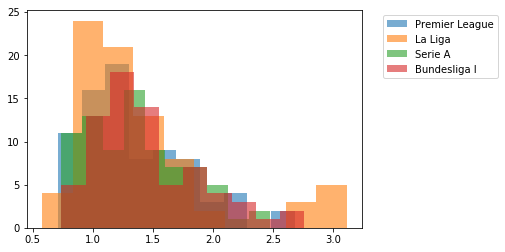

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A6C8278>]], dtype=object)

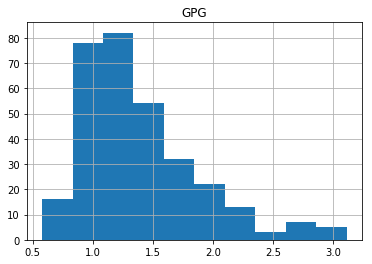

In [11]:
#Plot frenquency distribution of FPG by league - broken down by color
plt.hist(df[df["LEAGUE"]=="Premier League"]["GPG"].reset_index(drop=True), alpha=0.6, label="Premier League")
plt.hist(df[df["LEAGUE"]=="La Liga"]["GPG"].reset_index(drop=True), alpha=0.6, label="La Liga")
plt.hist(df[df["LEAGUE"]=="Serie A"]["GPG"].reset_index(drop=True), alpha=0.6, label="Serie A")
plt.hist(df[df["LEAGUE"]=="Bundesliga I"]["GPG"].reset_index(drop=True), alpha=0.6, label="Bundesliga I")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

#Normal distribution 
df.hist('GPG')




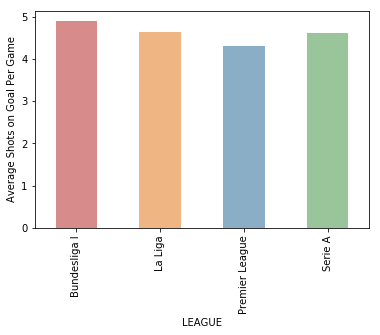

In [12]:
#SOGPG Calculation 
Fouls_Viz = dfGrouped['SOGPG'].mean()

BarChart = Fouls_Viz.plot(kind = 'bar', color = my_colors).set_ylabel('Average Shots on Goal Per Game')


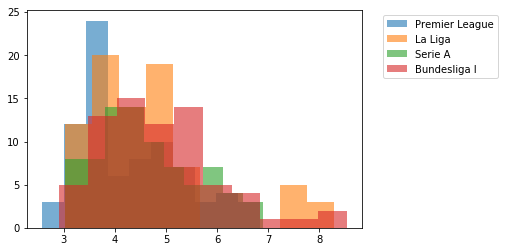

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009C18DA0>]], dtype=object)

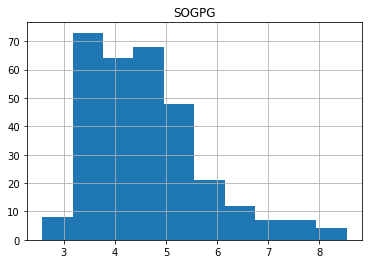

In [13]:
#Plot frenquency distribution of FPG by league - broken down by color
plt.hist(df[df["LEAGUE"]=="Premier League"]["SOGPG"].reset_index(drop=True), alpha=0.6, label="Premier League")
plt.hist(df[df["LEAGUE"]=="La Liga"]["SOGPG"].reset_index(drop=True), alpha=0.6, label="La Liga")
plt.hist(df[df["LEAGUE"]=="Serie A"]["SOGPG"].reset_index(drop=True), alpha=0.6, label="Serie A")
plt.hist(df[df["LEAGUE"]=="Bundesliga I"]["SOGPG"].reset_index(drop=True), alpha=0.6, label="Bundesliga I")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

#Normal distribution 
df.hist('SOGPG')


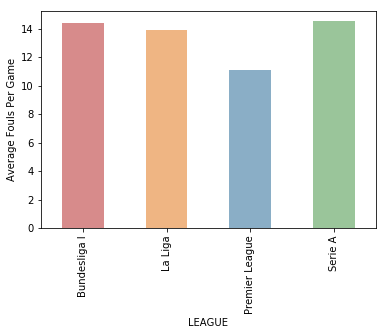

In [14]:
#SOGPG Calculation 
Fouls_Viz = dfGrouped['FPG'].mean()

BarChart = Fouls_Viz.plot(kind = 'bar', color = my_colors).set_ylabel('Average Fouls Per Game')



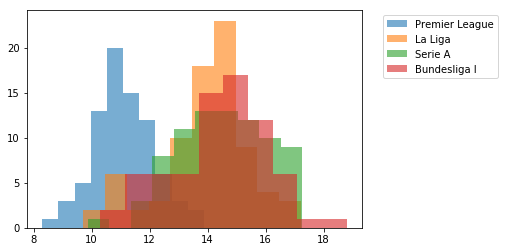

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B48C5C0>]], dtype=object)

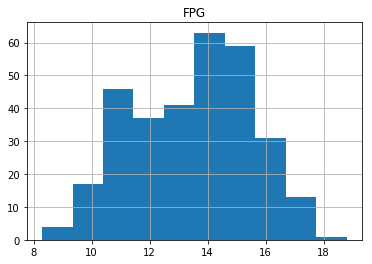

In [15]:
#Plot frenquency distribution of FPG by league - broken down by color
plt.hist(df[df["LEAGUE"]=="Premier League"]["FPG"].reset_index(drop=True), alpha=0.6, label="Premier League")
plt.hist(df[df["LEAGUE"]=="La Liga"]["FPG"].reset_index(drop=True), alpha=0.6, label="La Liga")
plt.hist(df[df["LEAGUE"]=="Serie A"]["FPG"].reset_index(drop=True), alpha=0.6, label="Serie A")
plt.hist(df[df["LEAGUE"]=="Bundesliga I"]["FPG"].reset_index(drop=True), alpha=0.6, label="Bundesliga I")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

#Normal distribution 
df.hist('FPG')

